Практическое занятие № 2

«Решение задачи классификации.
Прогнозирование выживаемости пассажиров титаника»

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

1.	Для выполнения задания использовать данные – https://www.kaggle.com/competitions/titanic/data .

In [2]:
from IPython.display import display
data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')
display(data.head(5), test_data.head(5))

"""
Описание данных
survival -	выжил ли	*0 = No, 1 = Yes)
pclass	- класс билета (1 = 1st, 2 = 2nd, 3 = 3rd)
sex - пол
Age - возраст
sibsp	- количество братьев и сестер / супругов на борту «Титаника»
parch	- количество родителей/детей на борту «Титаника»
ticket	- номер билета
fare	- стоимость проезда пассажира
cabin	- номер каюты
embarked	- порт посадки	(C = Cherbourg, Q = Queenstown, S = Southampton)
"""

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'\nОписание данных\nsurvival -\tвыжил ли\t*0 = No, 1 = Yes)\npclass\t- класс билета (1 = 1st, 2 = 2nd, 3 = 3rd)\nsex - пол\nAge - возраст\nsibsp\t- количество братьев и сестер / супругов на борту «Титаника»\nparch\t- количество родителей/детей на борту «Титаника»\nticket\t- номер билета\nfare\t- стоимость проезда пассажира\ncabin\t- номер каюты\nembarked\t- порт посадки\t(C = Cherbourg, Q = Queenstown, S = Southampton)\n'

2.	Загрузить и исследовать данные. Вывести размерность данных, основные описательные статистики, типы данных для признаков.

In [3]:
print("Обучающие данные")
print("\nРазмерность:", data.shape)
print("\nТипы признаков:\n", data.dtypes)
print("\nОписание:\n", data.describe())
print("\nДисперсия числовых признаков:\n", data.select_dtypes(include=['number']).var())

print("\nТестовые данные:")
print("\nРазмерность:", test_data.shape)
print("\nТипы признаков:\n", test_data.dtypes)
print("\nОписание:\n", test_data.describe())
print("\nДисперсия числовых признаков тестовых данных:\n", test_data.select_dtypes(include=['number']).var())

Обучающие данные

Размерность: (891, 12)

Типы признаков:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Описание:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

        

3.	Осуществить проверку данных на наличие пропущенных значений. Если пропущенные значения есть – выбрать стратегию работы с пропусками для каждого отдельного признака и избавиться от них.

In [4]:
display("data:", data.isnull().sum(), "test:", test_data.isnull().sum())

'data:'

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


'test:'

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [5]:
# Обработка пропусков в Age — заполняем медианой
data['Age'] = data['Age'].fillna(data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

# Обработка пропусков в Fare — заполняем медианой
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Обработка пропусков в Embarked — заполняем модой
most_common_embarked = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(most_common_embarked)
test_data['Embarked'] = test_data['Embarked'].fillna(most_common_embarked)

# Обработка пропусков в Cabin — заполняем 'Unknown'
data['Cabin'] = data['Cabin'].fillna('Unknown')
test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')

display("data:", data.isnull().sum(), "test:", test_data.isnull().sum())

'data:'

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


'test:'

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


4.	Удалить из данных признаки: PassengerId, Name, Ticket.

In [6]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

5.	На основе признаков SibSp и Parch создать категориальный признак TravelAlone, который определяет путешествовал ли человек в одиночку или нет.

In [7]:
data['TravelAlone'] = ((data['SibSp'] + data['Parch']) == 0).astype(int)
test_data['TravelAlone'] = ((test_data['SibSp'] + test_data['Parch']) == 0).astype(int)

display(data.head(5), test_data.head(5))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TravelAlone
0,0,3,male,22.0,1,0,7.2500,Unknown,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,Unknown,S,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,Unknown,S,1


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TravelAlone
0,3,male,34.5,0,0,7.8292,Unknown,Q,1
1,3,female,47.0,1,0,7.0000,Unknown,S,0
2,2,male,62.0,0,0,9.6875,Unknown,Q,1
3,3,male,27.0,0,0,8.6625,Unknown,S,1
4,3,female,22.0,1,1,12.2875,Unknown,S,0


6.	Используя функцию value_counts(), посчитать количество человек каждого пола. С помощью countplot из seaborn визуализировать эти данные.

Sex
male      577
female    314
Name: count, dtype: int64


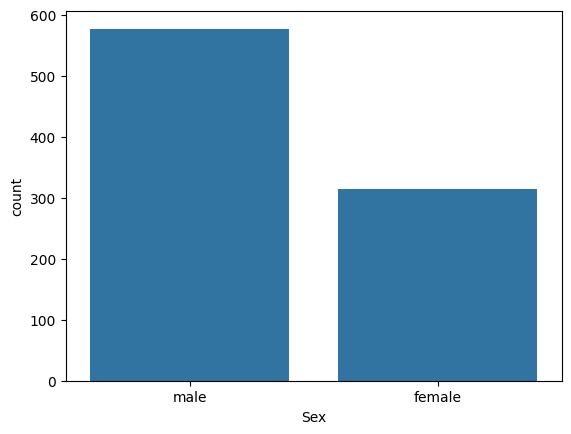

In [8]:
print(data['Sex'].value_counts())
sns.countplot(x='Sex', data=data)
plt.show()

7.	С помощью barplot из seaborn визуализировать влияние признака пол на выживаемость пассажиров. Построить гистограмму количества погибших и выживших пассажиров среди мужчин и женщин (использовать countplot из seaborn).

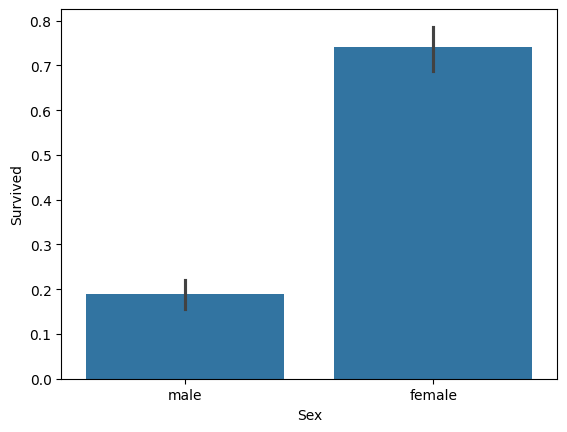

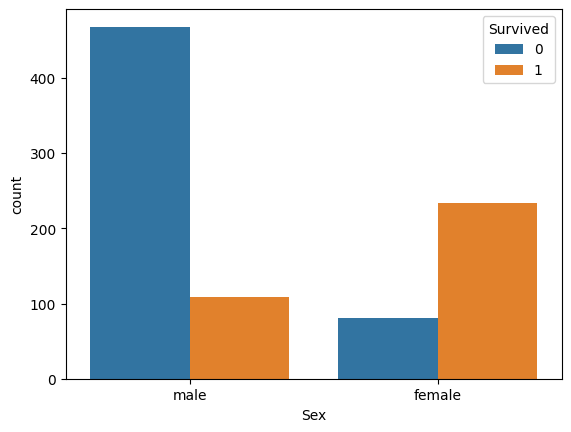

In [9]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

sns.countplot(x='Sex', hue='Survived', data=data)
plt.show()

8.	Посчитать количество пассажиров в зависимости от признака Pclass. Построить гистограмму по этим данным (countplot).

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


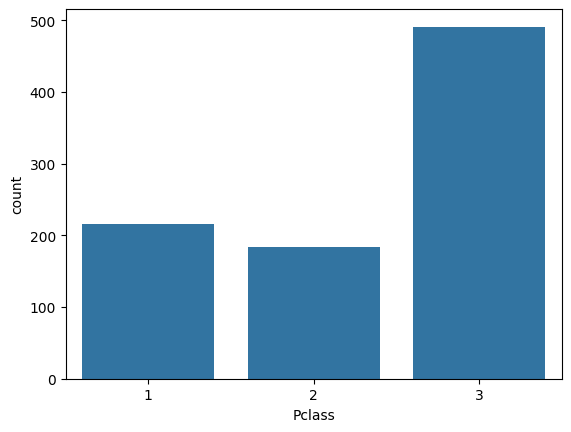

In [10]:
print(data['Pclass'].value_counts())
sns.countplot(x='Pclass', data=data)
plt.show()

9.	Исследовать влияние признака Pclass на выживаемость, визуализировать данные на основе barplot. Построить гистограмму количества погибших и выживших пассажиров, сгруппировав данные по признаку Pclass (использовать countplot из seaborn).

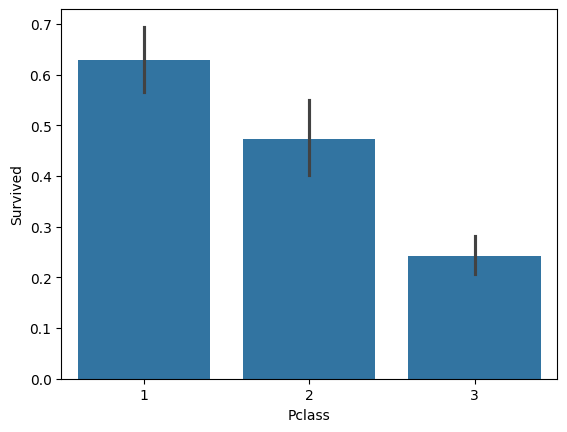

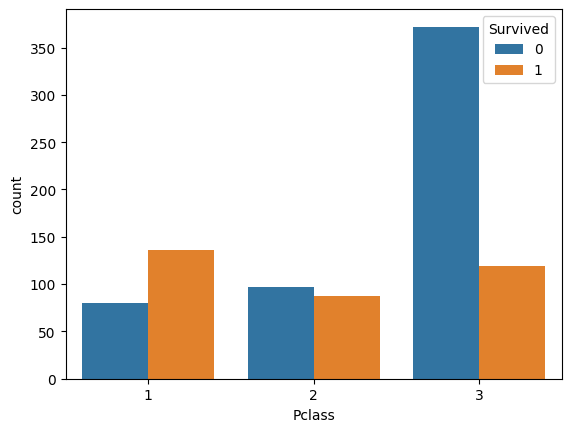

In [11]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=data)
plt.show()

10.	Исследовать выживаемость пассажиров в зависимости от возраста.

      Age  Не выжило  Выжило
0    0.42        0.0     1.0
1    0.67        0.0     1.0
2    0.75        0.0     2.0
3    0.83        0.0     2.0
4    0.92        0.0     1.0
..    ...        ...     ...
83  70.00        2.0     0.0
84  70.50        1.0     0.0
85  71.00        2.0     0.0
86  74.00        1.0     0.0
87  80.00        0.0     1.0

[88 rows x 3 columns]


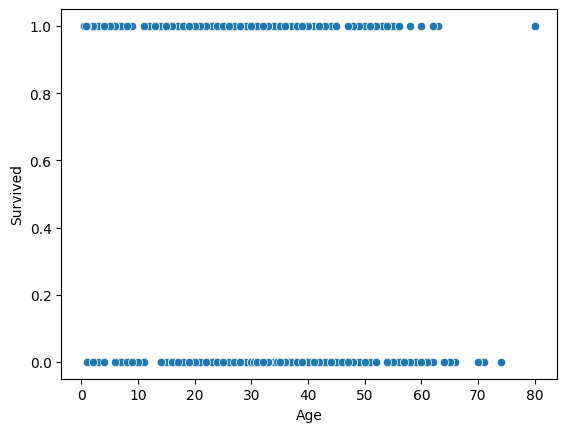

In [12]:
age_survival_counts = data.groupby(['Age', 'Survived']).size().reset_index(name='Count')

# Таблица с возрастом, количеством выживших и количеством погибших
survival_table = age_survival_counts.pivot(index='Age', columns='Survived', values='Count').fillna(0)
survival_table.columns = ['Не выжило', 'Выжило']
survival_table.reset_index(inplace=True)

print(survival_table)

sns.scatterplot(x='Age', y='Survived', data=data)
plt.show()

11.	Построить lmplot из библиотеки seaborn, указав следующие аргумены (x='Age',y='Survived'). Сделать вывод по полученной визуализации.

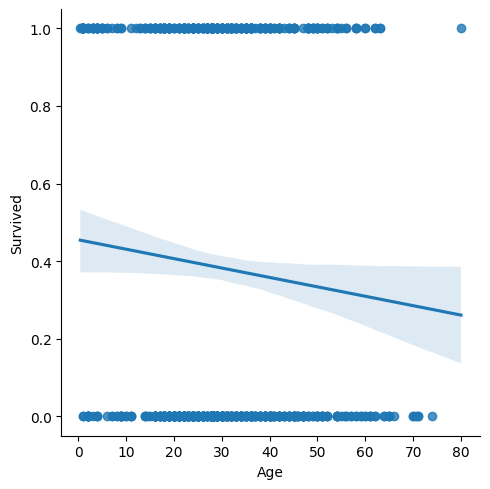

In [13]:
sns.lmplot(x='Age', y='Survived', data=data)
plt.show()

12.	Вывести количество пассажиров по признаку «Emabarked», визуализировать с помощью countplot.

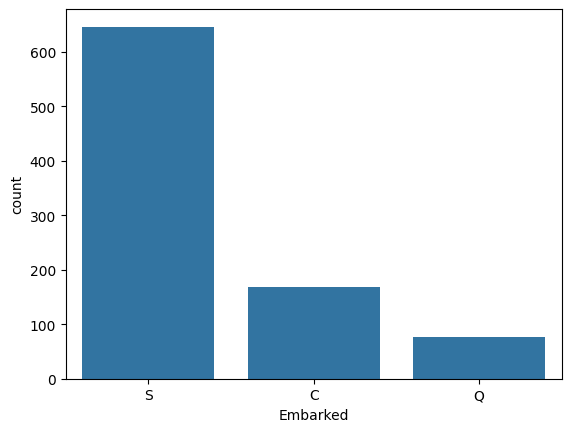

In [14]:
sns.countplot(x='Embarked', data=data)
plt.show()

13.	Исследовать влияние признака «Embarked» на выживаемость, визуализировать с помощью barplot. Построить гистограмму количества погибших и выживших пассажиров, сгруппировав данные по признаку «Embarked» (использовать countplot из seaborn).

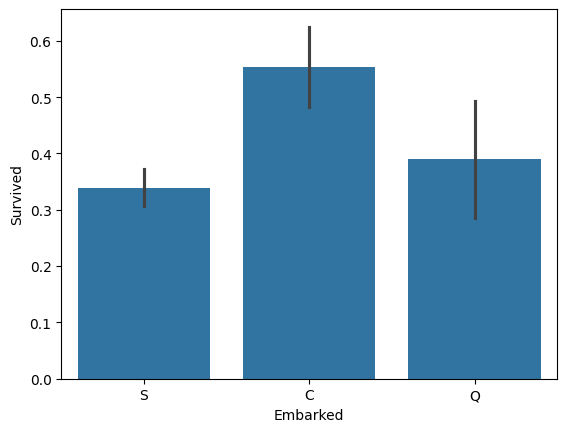

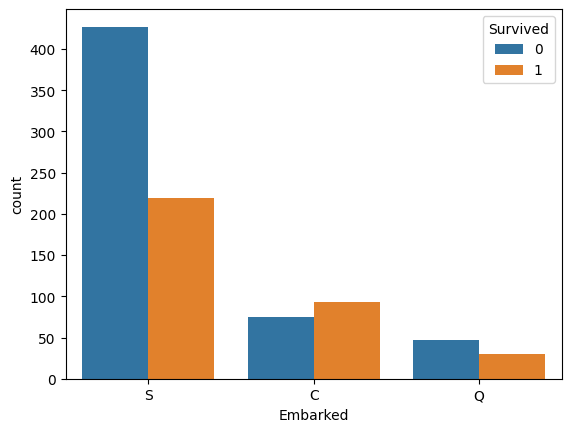

In [15]:
sns.barplot(x='Embarked', y='Survived', data=data)
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=data)
plt.show()

14.	Вывести количество пассажиров на основе признака «TravelAlone», визуализировать данные с помощью countplot.

TravelAlone
1    537
0    354
Name: count, dtype: int64


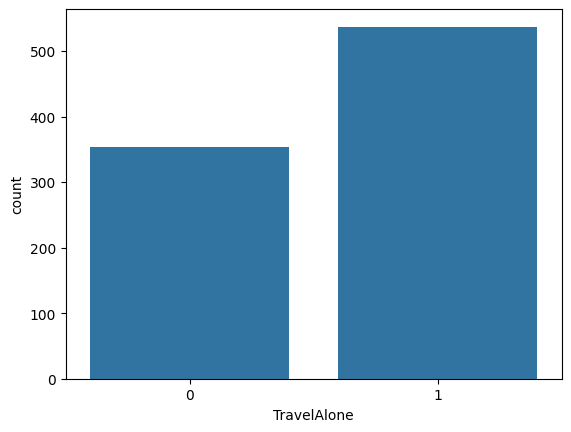

In [16]:
print(data['TravelAlone'].value_counts())
sns.countplot(x='TravelAlone', data=data)
plt.show()

15.	Исследовать влияние признака «TravelAlone» на выживаемость, визуализировать с помощью с помощью barplot.

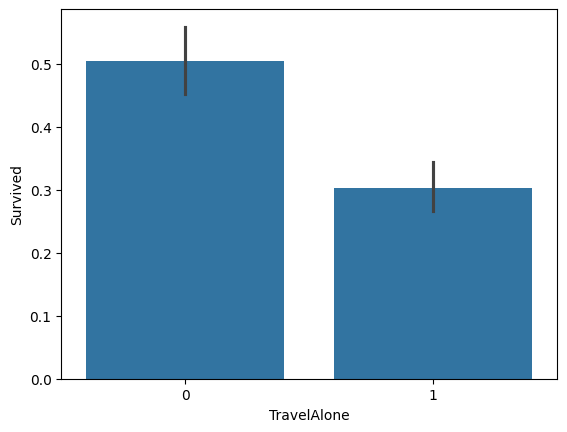

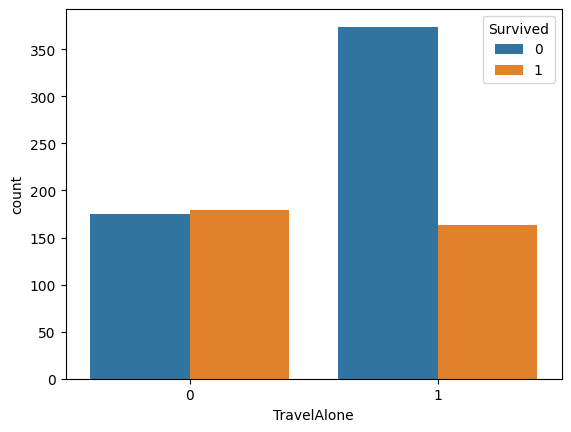

In [17]:
sns.barplot(x='TravelAlone', y='Survived', data=data)
plt.show()

sns.countplot(x='TravelAlone', hue='Survived', data=data)
plt.show()

16.	По данным построить матрицу корреляций. Сделать выводы на основании полученных значений.

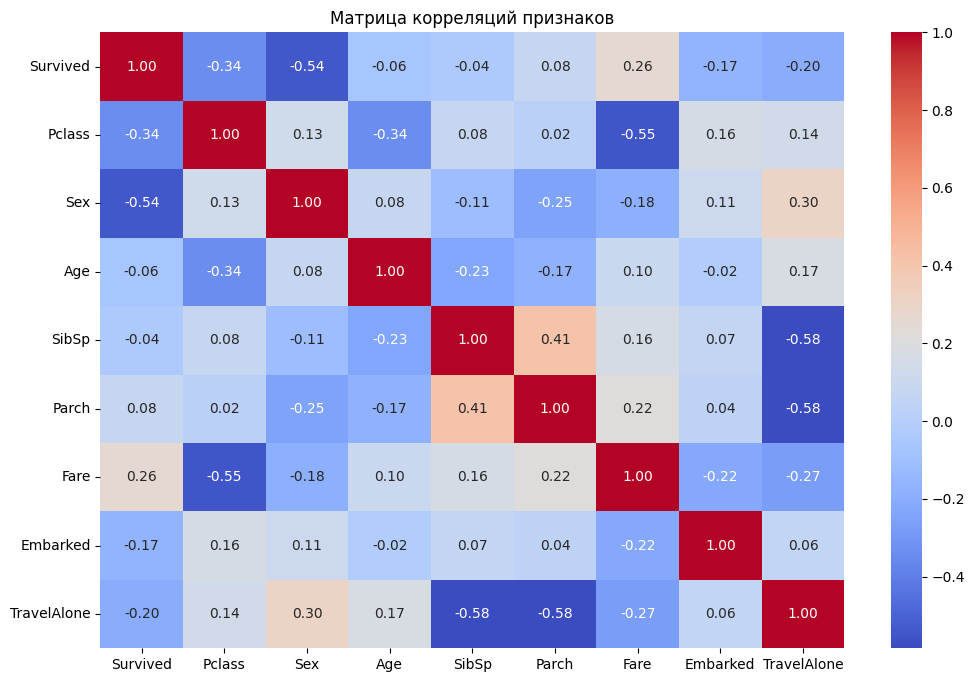

In [18]:
data_numeric = data
categorical_features = ['Sex', 'Embarked']

# Кодируем категориальные признаки
for feature in categorical_features:
    le = LabelEncoder()
    data_numeric[feature] = le.fit_transform(data_numeric[feature])

# Корреляция
corr_matrix = data_numeric.select_dtypes(include=['number']).corr()

# Визуализация матрицы корреляций тепловой картой
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матрица корреляций признаков')
plt.show()

Удалённые признаки из-за мультиколлинеарности: ['Pclass', 'TravelAlone']


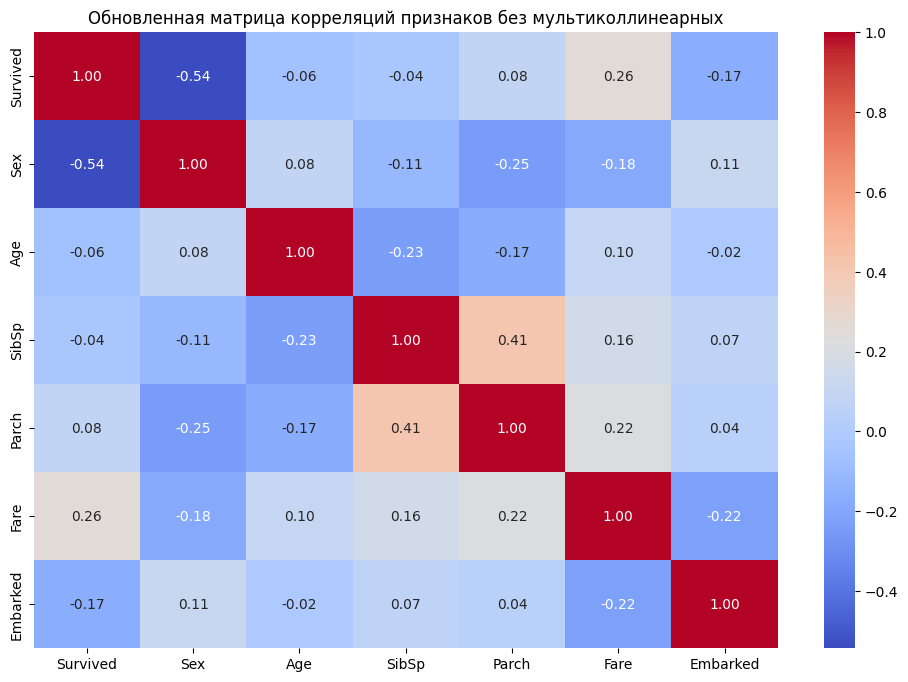

In [19]:
target_feature = 'Survived'

corr_matrix = data_numeric.select_dtypes(include=['number']).corr()
threshold = 0.5
to_drop = set()

# Проходим по всем парам признаков
for feature1 in corr_matrix.columns:
    for feature2 in corr_matrix.columns:
        if feature1 != feature2 and feature2 not in to_drop:
            corr_value = corr_matrix.loc[feature1, feature2]
            if abs(corr_value) > threshold:
                # Получаем корреляции с таргетом
                corr_feat1 = abs(corr_matrix.loc[feature1, target_feature]) if feature1 != target_feature else 1
                corr_feat2 = abs(corr_matrix.loc[feature2, target_feature]) if feature2 != target_feature else 1

                # Если один из признаков - это таргет, его не удаляем
                if feature1 != target_feature and feature2 != target_feature:
                    # Удаляем тот признак, у которого большая корреляция с таргетом
                    if corr_feat1 < corr_feat2:
                        to_drop.add(feature2)
                    else:
                        to_drop.add(feature1)

# Финальный список признаков
final_features = [feat for feat in corr_matrix.columns if feat not in to_drop and feat != target_feature]

print("Удалённые признаки из-за мультиколлинеарности:", list(to_drop))
data_final = data[[target_feature] + final_features]
corr_matrix_final = data_final.corr()

# Визуализируем
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_final, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Обновленная матрица корреляций признаков без мультиколлинеарных')
plt.show()

17.	Для категориальных признаков «Sex» и «Embarked» выполнить Label-кодирование.

In [20]:
data_numeric = data
categorical_features = ['Sex', 'Embarked']

for feature in categorical_features:
    le = LabelEncoder()
    data_numeric[feature] = le.fit_transform(data_numeric[feature])

display(data.head(5))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TravelAlone
0,0,3,1,22.0,1,0,7.2500,Unknown,2,0
1,1,1,0,38.0,1,0,71.2833,C85,0,0
2,1,3,0,26.0,0,0,7.9250,Unknown,2,1
3,1,1,0,35.0,1,0,53.1000,C123,2,0
4,0,3,1,35.0,0,0,8.0500,Unknown,2,1


18.	Разделить данные на обучающую и тестовую выборки.

In [21]:
data.drop('Cabin', axis=1, inplace=True)
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

display(data.head(5))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TravelAlone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,1


19.	Построить различные модели для прогноза выживаемости пассажира (не менее 3 моделей). Выбрать метрику и сравнить по ней построенные модели.

Linear Regression: Средний MSE = 0.1474, Стандартное отклонение = 0.013260
Ridge (alpha=0.1): Средний MSE = 0.1474, Стандартное отклонение = 0.013257
Ridge (alpha=1): Средний MSE = 0.1473, Стандартное отклонение = 0.013236
Ridge (alpha=10): Средний MSE = 0.1472, Стандартное отклонение = 0.013043
Ridge (alpha=100): Средний MSE = 0.1546, Стандартное отклонение = 0.012265
Ridge (alpha=10000): Средний MSE = 0.2169, Стандартное отклонение = 0.010528
Lasso (alpha=0.1): Средний MSE = 0.2077, Стандартное отклонение = 0.011191
Lasso (alpha=1): Средний MSE = 0.2227, Стандартное отклонение = 0.008934
Lasso (alpha=10): Средний MSE = 0.2374, Стандартное отклонение = 0.009357
Lasso (alpha=100): Средний MSE = 0.2374, Стандартное отклонение = 0.009357
Lasso (alpha=10000): Средний MSE = 0.2374, Стандартное отклонение = 0.009357

Лучшая модель: Ridge (alpha=10) со средним MSE = 0.1472


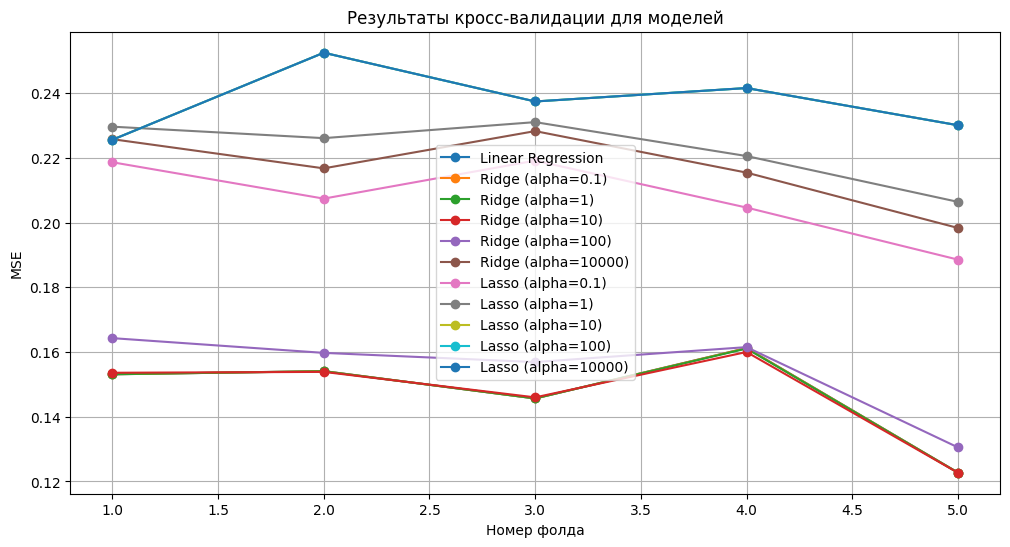

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt

# Модели линейной регрессии с разными гиперпараметрами
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (alpha=0.1)': Ridge(alpha=0.1),
    'Ridge (alpha=1)': Ridge(alpha=1),
    'Ridge (alpha=10)': Ridge(alpha=10),
    'Ridge (alpha=100)': Ridge(alpha=100),
    'Ridge (alpha=10000)': Ridge(alpha=10000),
    'Lasso (alpha=0.1)': Lasso(alpha=0.1),
    'Lasso (alpha=1)': Lasso(alpha=1),
    'Lasso (alpha=10)': Lasso(alpha=10),
    'Lasso (alpha=100)': Lasso(alpha=100),
    'Lasso (alpha=10000)': Lasso(alpha=10000),
}

# Создаем scorer для MSE (отрицательное значение для корректной работы cross_val_score)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Для хранения всех значений MSE по фолдам
mse_results = {}

# Кросс-валидация и сбор данных
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
    mse_values = -scores
    mse_results[name] = mse_values
    print(f"{name}: Средний MSE = {mse_values.mean():.4f}, Стандартное отклонение = {mse_values.std():.6f}")

# Визуализация распределения MSE для всех моделей
plt.figure(figsize=(12, 6))
for name, mse_values in mse_results.items():
    plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', label=name)

best_model_name = min(mse_results, key=lambda name: mse_results[name].mean())
best_mse = mse_results[best_model_name].mean()

print(f"\nЛучшая модель: {best_model_name} со средним MSE = {best_mse:.4f}")

plt.xlabel('Номер фолда')
plt.ylabel('MSE')
plt.title('Результаты кросс-валидации для моделей')
plt.legend()
plt.grid(True)
plt.show()

20.	Для каждой модели построить матрицу ошибок (confusion_matrix) и classification_report по тестовой выборке.



Модель: Linear Regression

Confusion Matrix:
True Positives / True Negatives
False Positives / False Negatives


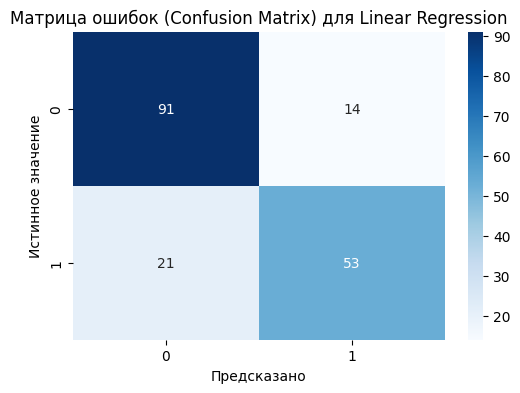


Classification Report:
Precision (точность) — доля TP из предсказанных как положительные.
Recall (чувствительность) — доля TP из всех фактических положительных.
F1-score — гармоническое среднее precision и recall.
Support — число образцов каждого класса в тестовой выборке.

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Модель: Ridge (alpha=0.1)

Confusion Matrix:
True Positives / True Negatives
False Positives / False Negatives


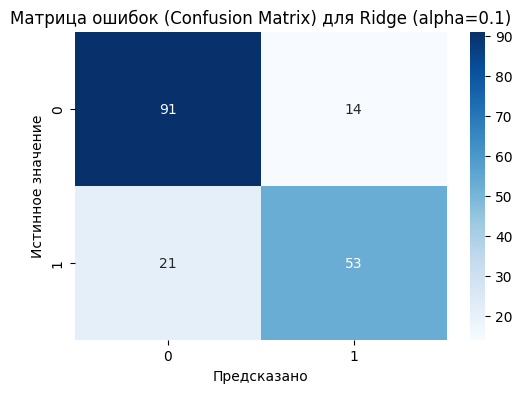


Classification Report:
Precision (точность) — доля TP из предсказанных как положительные.
Recall (чувствительность) — доля TP из всех фактических положительных.
F1-score — гармоническое среднее precision и recall.
Support — число образцов каждого класса в тестовой выборке.

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Модель: Ridge (alpha=1)

Confusion Matrix:
True Positives / True Negatives
False Positives / False Negatives


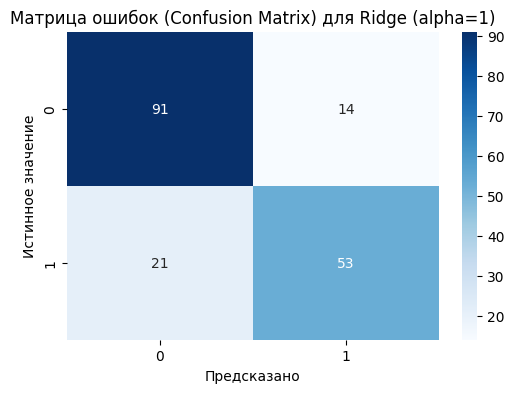


Classification Report:
Precision (точность) — доля TP из предсказанных как положительные.
Recall (чувствительность) — доля TP из всех фактических положительных.
F1-score — гармоническое среднее precision и recall.
Support — число образцов каждого класса в тестовой выборке.

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Модель: Ridge (alpha=10)

Confusion Matrix:
True Positives / True Negatives
False Positives / False Negatives


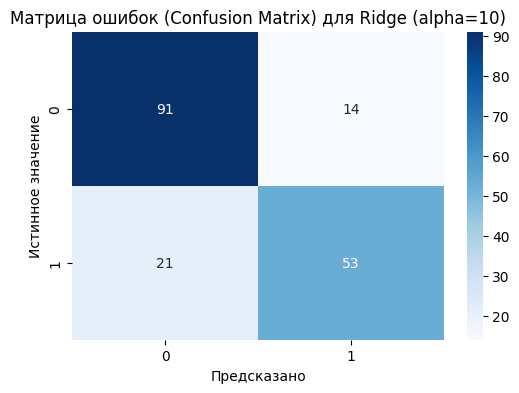


Classification Report:
Precision (точность) — доля TP из предсказанных как положительные.
Recall (чувствительность) — доля TP из всех фактических положительных.
F1-score — гармоническое среднее precision и recall.
Support — число образцов каждого класса в тестовой выборке.

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Модель: Ridge (alpha=100)

Confusion Matrix:
True Positives / True Negatives
False Positives / False Negatives


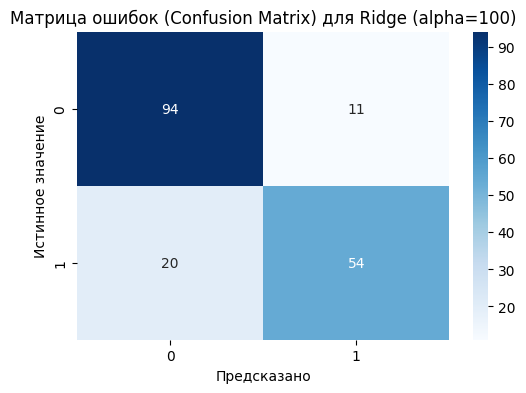


Classification Report:
Precision (точность) — доля TP из предсказанных как положительные.
Recall (чувствительность) — доля TP из всех фактических положительных.
F1-score — гармоническое среднее precision и recall.
Support — число образцов каждого класса в тестовой выборке.

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



Модель: Ridge (alpha=10000)

Confusion Matrix:
True Positives / True Negatives
False Positives / False Negatives


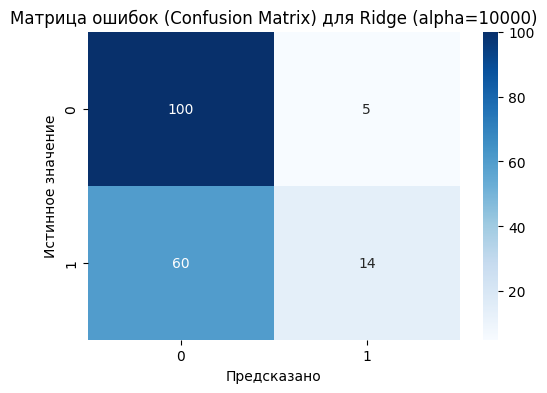


Classification Report:
Precision (точность) — доля TP из предсказанных как положительные.
Recall (чувствительность) — доля TP из всех фактических положительных.
F1-score — гармоническое среднее precision и recall.
Support — число образцов каждого класса в тестовой выборке.

              precision    recall  f1-score   support

           0       0.62      0.95      0.75       105
           1       0.74      0.19      0.30        74

    accuracy                           0.64       179
   macro avg       0.68      0.57      0.53       179
weighted avg       0.67      0.64      0.57       179



Модель: Lasso (alpha=0.1)

Confusion Matrix:
True Positives / True Negatives
False Positives / False Negatives


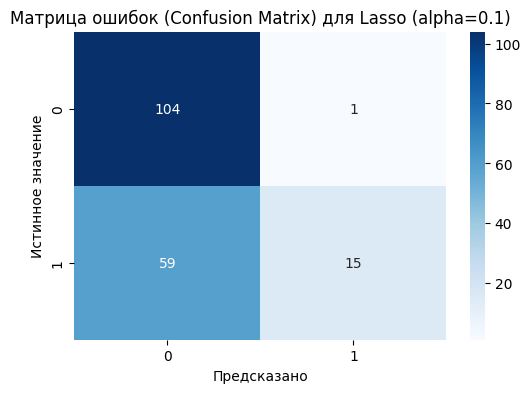


Classification Report:
Precision (точность) — доля TP из предсказанных как положительные.
Recall (чувствительность) — доля TP из всех фактических положительных.
F1-score — гармоническое среднее precision и recall.
Support — число образцов каждого класса в тестовой выборке.

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       105
           1       0.94      0.20      0.33        74

    accuracy                           0.66       179
   macro avg       0.79      0.60      0.55       179
weighted avg       0.76      0.66      0.59       179



Модель: Lasso (alpha=1)

Confusion Matrix:
True Positives / True Negatives
False Positives / False Negatives


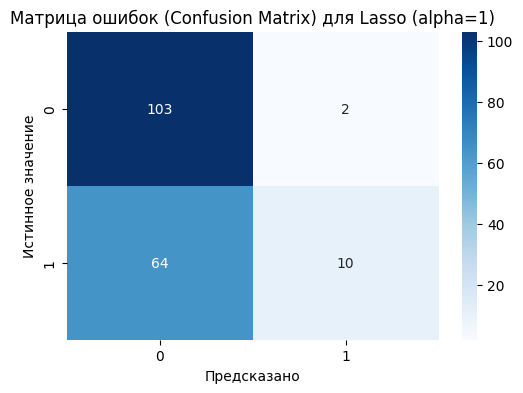


Classification Report:
Precision (точность) — доля TP из предсказанных как положительные.
Recall (чувствительность) — доля TP из всех фактических положительных.
F1-score — гармоническое среднее precision и recall.
Support — число образцов каждого класса в тестовой выборке.

              precision    recall  f1-score   support

           0       0.62      0.98      0.76       105
           1       0.83      0.14      0.23        74

    accuracy                           0.63       179
   macro avg       0.73      0.56      0.49       179
weighted avg       0.71      0.63      0.54       179



Модель: Lasso (alpha=10)

Confusion Matrix:
True Positives / True Negatives
False Positives / False Negatives


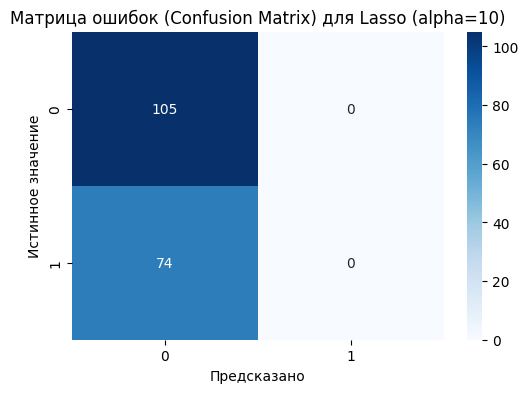


Classification Report:
Precision (точность) — доля TP из предсказанных как положительные.
Recall (чувствительность) — доля TP из всех фактических положительных.
F1-score — гармоническое среднее precision и recall.
Support — число образцов каждого класса в тестовой выборке.

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



Модель: Lasso (alpha=100)

Confusion Matrix:
True Positives / True Negatives
False Positives / False Negatives


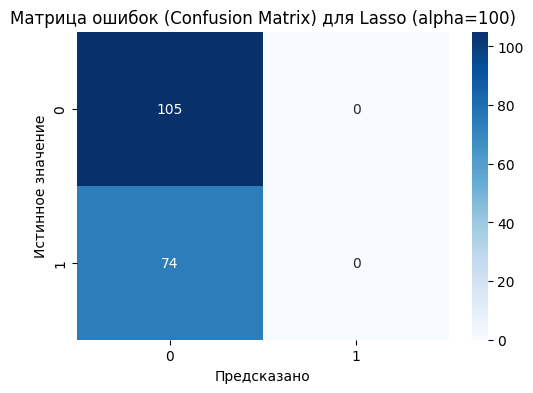


Classification Report:
Precision (точность) — доля TP из предсказанных как положительные.
Recall (чувствительность) — доля TP из всех фактических положительных.
F1-score — гармоническое среднее precision и recall.
Support — число образцов каждого класса в тестовой выборке.

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



Модель: Lasso (alpha=10000)

Confusion Matrix:
True Positives / True Negatives
False Positives / False Negatives


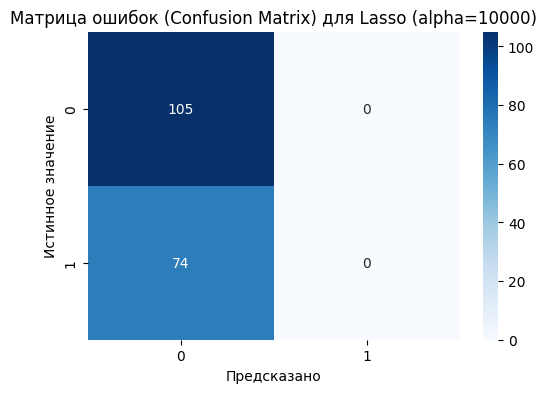


Classification Report:
Precision (точность) — доля TP из предсказанных как положительные.
Recall (чувствительность) — доля TP из всех фактических положительных.
F1-score — гармоническое среднее precision и recall.
Support — число образцов каждого класса в тестовой выборке.

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



In [23]:
from sklearn.metrics import confusion_matrix, classification_report

for name, model in models.items():
    # Обучение модели
    model.fit(X, y)

    # Предсказания на тестовой выборке
    preds = model.predict(X_val)
    preds = (preds >= 0.5).astype(int)  # если требуется, иначе можно оставить как есть

    print(f"\n\nМодель: {name}")
    print("\nConfusion Matrix:\nTrue Positives / True Negatives\nFalse Positives / False Negatives")

    # Построение матрицы ошибок
    cm = confusion_matrix(y_val, preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок (Confusion Matrix) для {name}')
    plt.xlabel('Предсказано')
    plt.ylabel('Истинное значение')
    plt.show()

    print("\nClassification Report:")
    print("Precision (точность) — доля TP из предсказанных как положительные.")
    print("Recall (чувствительность) — доля TP из всех фактических положительных.")
    print("F1-score — гармоническое среднее precision и recall.")
    print("Support — число образцов каждого класса в тестовой выборке.\n")
    print(classification_report(y_val, preds, zero_division=0))

21.	Для лучшей модели подобрать оптимальные значения параметров с помощью поиска по сетке (GridSearchCV).

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Определение модели
ridge = Ridge()

# Диапазон значений альфа для поиска
param_grid = {
    'alpha': np.logspace(-4, 4, 50)  # от 0.0001 до 10000
}

# Создаем GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring=mse_scorer, n_jobs=-1)

# Обучение
grid_search.fit(X, y)

# Лучшие параметры и результат
print(f"Лучшее значение alpha: {grid_search.best_params_['alpha']}")
print(f"Лучшее среднее значение MSE: {-grid_search.best_score_:.4f}")

Лучшее значение alpha: 7.9060432109076855
Лучшее среднее значение MSE: 0.1472


22.	На основе лучшей модели с оптимальными параметрами сделать прогнозы на новых данных (файл test.csv).

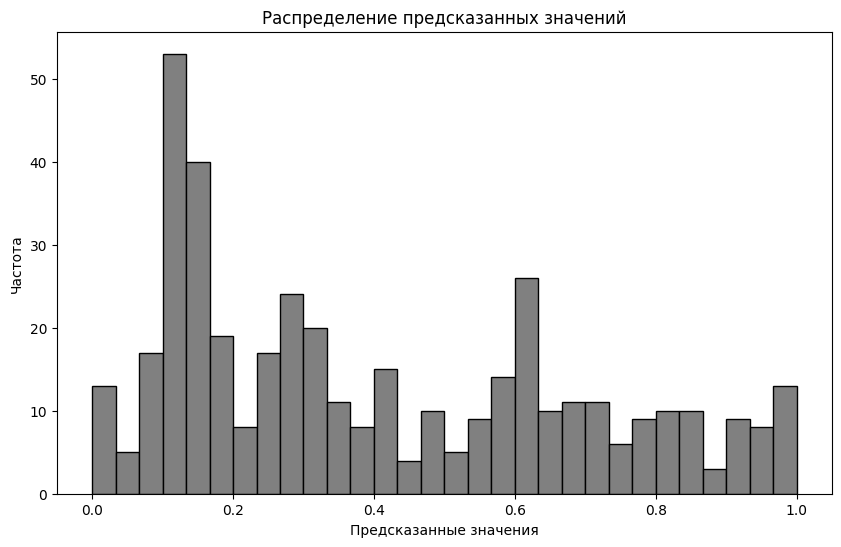

In [25]:
data_numeric = test_data

best_alpha = 7.9060432109076855
ridge = Ridge(alpha=best_alpha)

categorical_features = ['Sex', 'Embarked']
# Кодируем категориальные признаки
for feature in categorical_features:
    le = LabelEncoder()
    data_numeric[feature] = le.fit_transform(data_numeric[feature])

if 'Cabin' in data_numeric.columns:
    data_numeric = data_numeric.drop('Cabin', axis=1)

ridge.fit(X, y)
predictions = ridge.predict(data_numeric)
predictions_clipped = np.clip(predictions, 0, 1)

# Построение гистограммы предсказанных значений
plt.figure(figsize=(10, 6))
plt.hist(predictions_clipped, bins=30, color='gray', edgecolor='black')
plt.title('Распределение предсказанных значений')
plt.xlabel('Предсказанные значения')
plt.ylabel('Частота')
plt.show()